In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
import tensorflow as tf
#from pypapi import events, papi_high as high

In [2]:
((X_train, Y_train), (X_test, Y_test)) = fashion_mnist.load_data()

In [3]:
class_labels = pd.Series(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Code', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])
labels_dict = class_labels.to_dict()
labels_dict

{0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Code',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

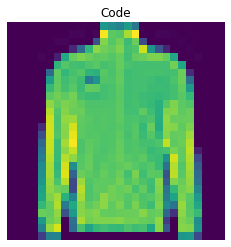

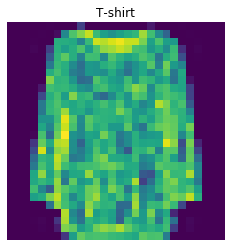

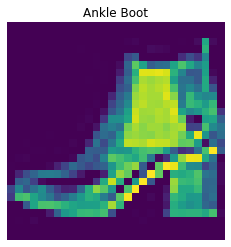

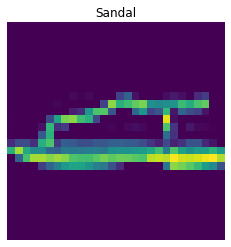

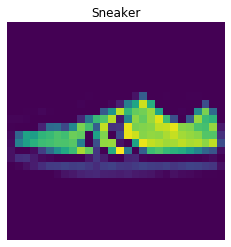

In [4]:
np.random.seed(40)
for rand_num in np.random.randint(0, len(X_train), 5):
    plt.figure()
    plt.imshow(X_train[rand_num]), plt.axis('off')
    plt.title(labels_dict[Y_train[rand_num]])

In [5]:
X_train_reshaped = X_train.reshape(len(X_train), -1)   
X_test_reshaped = X_test.reshape(len(X_test), -1)

X_train_norm = X_train_reshaped/255            
X_test_norm = X_test_reshaped/255

In [6]:
n_features = X_train_norm.shape[1]
n_classes =  len(class_labels)

print('Number of input features (image pixels) : ', n_features)
print('Number of target classes (fashion categories) : ', n_classes)

Number of input features (image pixels) :  784
Number of target classes (fashion categories) :  10


In [7]:
Y_train_onehot = to_categorical(Y_train, num_classes = n_classes)
Y_test_onehot = to_categorical(Y_test, num_classes = n_classes)

In [8]:
X_train_final, X_valid, Y_train_final, Y_valid = train_test_split(X_train_norm, Y_train_onehot, 
                                                                  test_size=0.16666)

print('Shape of data used for training, and shape of training targets : \n ', X_train.shape, ',', Y_train.shape)
print('Shape of data used for validation, and shape of validation targets: \n ', X_valid.shape, ',', Y_valid.shape)

Shape of data used for training, and shape of training targets : 
  (60000, 28, 28) , (60000,)
Shape of data used for validation, and shape of validation targets: 
  (10000, 784) , (10000, 10)


In [9]:
model = Sequential()
model.add(Dense(1000, input_dim = n_features, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(500, activation='relu', use_bias=False))
model.add(Dense(200, activation='relu', use_bias=False))
model.add(Dense(n_classes, activation='softmax', use_bias=False))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              784000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1000000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1000000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1000000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1000000   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1000000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1

In [10]:
save_at = "C:\\Users\\giorg\\Desktop\\model\\worklofmodel.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, 
                             save_best_only=True, save_weights_only=False, mode='max')

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
history = model.fit( X_train_final, Y_train_final, 
                    epochs = 30, batch_size = 20, 
                    callbacks=[reduce_lr], verbose=1, 
                    validation_data = (X_valid, Y_valid) )


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 309s 6ms/sample - loss: 1.6140 - accuracy: 0.1903 - val_loss: 1.5049 - val_accuracy: 0.1919
Epoch 2/30
50000/50000 [==============================] - 291s 6ms/sample - loss: 1.4640 - accuracy: 0.1999 - val_loss: 1.4467 - val_accuracy: 0.1983
Epoch 3/30
50000/50000 [==============================] - 286s 6ms/sample - loss: 1.4323 - accuracy: 0.2003 - val_loss: 1.4259 - val_accuracy: 0.1985
Epoch 4/30
50000/50000 [==============================] - 303s 6ms/sample - loss: 1.4209 - accuracy: 0.2002 - val_loss: 1.4203 - val_accuracy: 0.1915
Epoch 5/30
50000/50000 [==============================] - 274s 5ms/sample - loss: 1.4052 - accuracy: 0.2010 - val_loss: 1.4784 - val_accuracy: 0.1980
Epoch 6/30
50000/50000 [==============================] - 270s 5ms/sample - loss: 1.3923 - accuracy: 0.2011 - val_loss: 1.4265 - val_accuracy: 0.1947
Epoch 7/30
49980/50000 [==========================

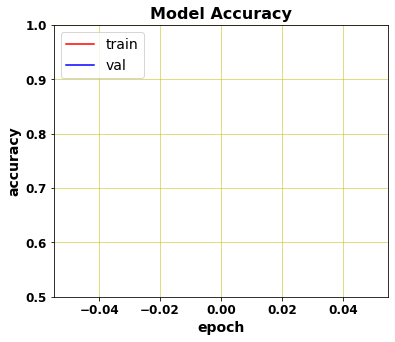

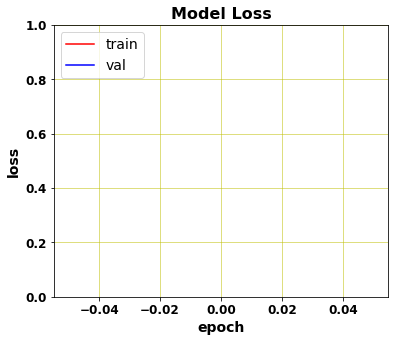

In [31]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.5, 1)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()



plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss', weight='bold', fontsize=16)
plt.ylabel('loss', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0, 1)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [32]:
from datetime import datetime
print("Start:",datetime.utcnow())
score = model.evaluate(X_test_norm, Y_test_onehot, verbose=0)
print("Stop:",datetime.utcnow())
print('Accuratezza sul test set: \n ', round((score[1]*100), 2), '%')

Start: 2023-04-21 15:16:45.505818
Stop: 2023-04-21 15:16:48.559335
Accuratezza sul test set: 
  88.25 %


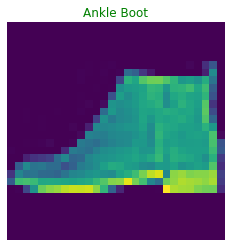

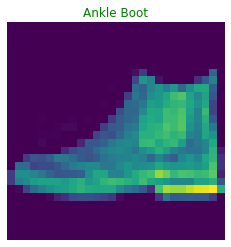

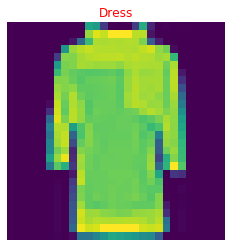

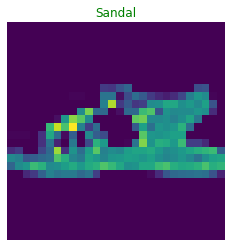

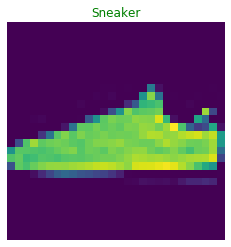

In [33]:
Y_pred = np.round(model.predict(X_test_norm))

np.random.seed(50)
for rand_num in np.random.randint(0, len(Y_test_onehot), 5):
    plt.figure()
    plt.imshow(X_test[rand_num]), plt.axis('off')
    if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test_onehot[rand_num] == 1)[0].sum():
        plt.title(labels_dict[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
    else :
        plt.title(labels_dict[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

In [34]:
trained_model = load_model("C:\\Users\\giorg\\Desktop\\model\\worklofmodel.hdf5")
trained_model.layers

In [36]:
trained_model= model
trained_model.layers

In [37]:
total_no_layers = len(trained_model.layers)
print(total_no_layers)

22


In [38]:
K = [0,10,20,30,40,50,60,70,80,90] 

In [41]:
from datetime import datetime
print("Start:",datetime.utcnow())
all_weights = {}

for layer_no in range(total_no_layers - 1):         #tutti tranne l'ultimo layer                                                                          
    layer_weights = (pd.DataFrame(trained_model.layers[layer_no].get_weights()[0]).stack()).to_dict() 
    layer_weights = { (layer_no, k[0], k[1]): v for k, v in layer_weights.items() }
    all_weights.update(layer_weights)
print("Stop:",datetime.utcnow())

Start: 2023-04-21 15:23:44.442662
Stop: 2023-04-21 15:24:18.698044


In [42]:
from datetime import datetime
print("Start:",datetime.utcnow())
all_weights_sorted = {k: v for k, v in sorted(all_weights.items(), key=lambda item: abs(item[1]))}
print("Stop:",datetime.utcnow())

Start: 2023-04-21 15:24:53.615612
Stop: 2023-04-21 15:25:45.680554


In [44]:
from datetime import datetime
print("Start:",datetime.utcnow())
weight_pruning_scores = []
total_no_weights = len(all_weights_sorted) 
total_no_weights 
for pruning_percent in K:
    
    #new_model = load_model("C:\\Users\\giorg\\Desktop\\worklofmodel.hdf5")
    new_model=model
    new_weights = trained_model.get_weights().copy()

    prune_fraction = pruning_percent/100
    number_of_weights_to_be_pruned = int(prune_fraction*total_no_weights)
    weights_to_be_pruned = {k: all_weights_sorted[k] for k in list(all_weights_sorted)[ :  number_of_weights_to_be_pruned]}     

    for k, v in weights_to_be_pruned.items():
        new_weights[k[0]][k[1], k[2]] = 0

    for layer_no in range(total_no_layers - 1) :
        new_layer_weights = new_weights[layer_no].reshape(1, new_weights[layer_no].shape[0], new_weights[layer_no].shape[1])
        new_model.layers[layer_no].set_weights(new_layer_weights)
    
    new_score  = new_model.evaluate(X_test_norm, Y_test_onehot, verbose=0)
    weight_pruning_scores .append(new_score[1])
    new_model.save("C:\\Users\\giorg\\Desktop\\worklof\\Nuova cartella")
    
    print(pruning_percent, new_score)
print("Stop:",datetime.utcnow())

Start: 2023-04-21 15:27:58.782935
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
0 [0.7609334287881852, 0.8825]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
10 [0.7568275616645813, 0.8817]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
20 [0.7241888987779618, 0.8822]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
30 [0.6522007122516632, 0.8808]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
40 [0.5380088230848312, 0.8838]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
50 [0.48579493832588194, 0.8826]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
60 [0.5752844501018524, 0.884]
INFO:tensorflow:Assets written to: C:\Users\giorg\Desktop\worklof\Nuova cartella\assets
70 [0.985593326473236, 0.8806]
INFO:ten

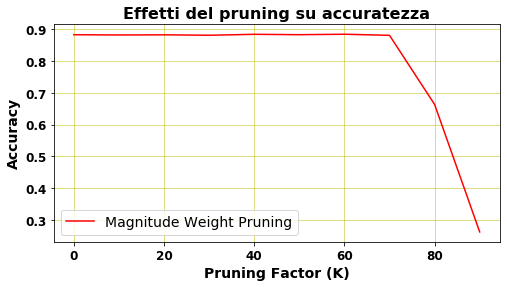

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(pd.DataFrame(weight_pruning_scores).set_index(pd.Series(K), drop=True) , color='r')
#plt.plot(pd.DataFrame(neuron_pruning_scores).set_index(pd.Series(K), drop=True) , color='b')
plt.title('Effetti del pruning su accuratezza', weight='bold', fontsize=16)
plt.ylabel('Accuracy', weight='bold', fontsize=14)
plt.xlabel('Pruning Factor (K)', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['Magnitude Weight Pruning'], loc='best', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()